 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [232]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pylab as pylab
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [233]:
# Reading whale returns
whale_returns_path = Path('Resources/whale_returns.csv')
whale_returns = pd.read_csv(whale_returns_path,
                           index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns.sort_index(ascending=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [234]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [235]:
# Drop nulls
whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [236]:
# Reading algorithmic returns
algo_returns_path = Path('Resources/algo_returns.csv')
algo_returns = pd.read_csv(algo_returns_path,
                          index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [237]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [238]:
# Drop nulls
algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [239]:
# Reading S&P 500 Closing Prices
sp500_history_path = Path('Resources/sp500_history.csv')
sp500_history = pd.read_csv(sp500_history_path,
                               index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_history.sort_index(ascending=True)
sp500_history = sp500_history[::-1]
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [240]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [241]:
# Fix Data Types
sp500_history['Close'] = sp500_history['Close'].map(lambda x: x.lstrip('$'))
sp500_history['Close'] = sp500_history['Close'].astype('float')
sp500_history['Close'] = sp500_history['Close'].round()
sp500_history['Close'].astype('int')
sp500_history.head()

,Close
Date,
2012-10-01,1444.0
2012-10-02,1446.0
2012-10-03,1451.0
2012-10-04,1461.0
2012-10-05,1461.0


##### Calculate Daily Returns


In [242]:
# Drop nulls
sp500_history.dropna()

,Close
Date,
2012-10-01,1444.0
2012-10-02,1446.0
2012-10-03,1451.0
2012-10-04,1461.0
2012-10-05,1461.0
...,...
2019-04-16,2907.0
2019-04-17,2900.0
2019-04-18,2905.0


In [243]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history = sp500_history.rename(columns={
    "Close": "S&P 500"
})
sp500_history.head()

,S&P 500
Date,
2012-10-01,1444.0
2012-10-02,1446.0
2012-10-03,1451.0
2012-10-04,1461.0
2012-10-05,1461.0


In [244]:
sp500_history_pctchange = sp500_history.pct_change()
sp500_history_pctchange.head()
sp500_history_pctchange.fillna(0)

,S&P 500
Date,
2012-10-01,0.000000
2012-10-02,0.001385
2012-10-03,0.003458
2012-10-04,0.006892
2012-10-05,0.000000
...,...
2019-04-16,0.000344
2019-04-17,-0.002408
2019-04-18,0.001724


## Combine Whale, Algorithmic, and S&P 500 Returns

In [245]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
concat_data = pd.concat([sp500_history_pctchange, algo_returns, whale_returns],axis='columns',join='inner')
concat_data.fillna(0)
concat_data

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-02,0.006179,-0.008158,0.003200,NaN,NaN,NaN,NaN
2015-03-03,-0.004251,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.004269,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.000953,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.014279,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...,...,...
2019-04-16,0.000344,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-17,-0.002408,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-18,0.001724,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of Portfolios'}, xlabel='Date'>

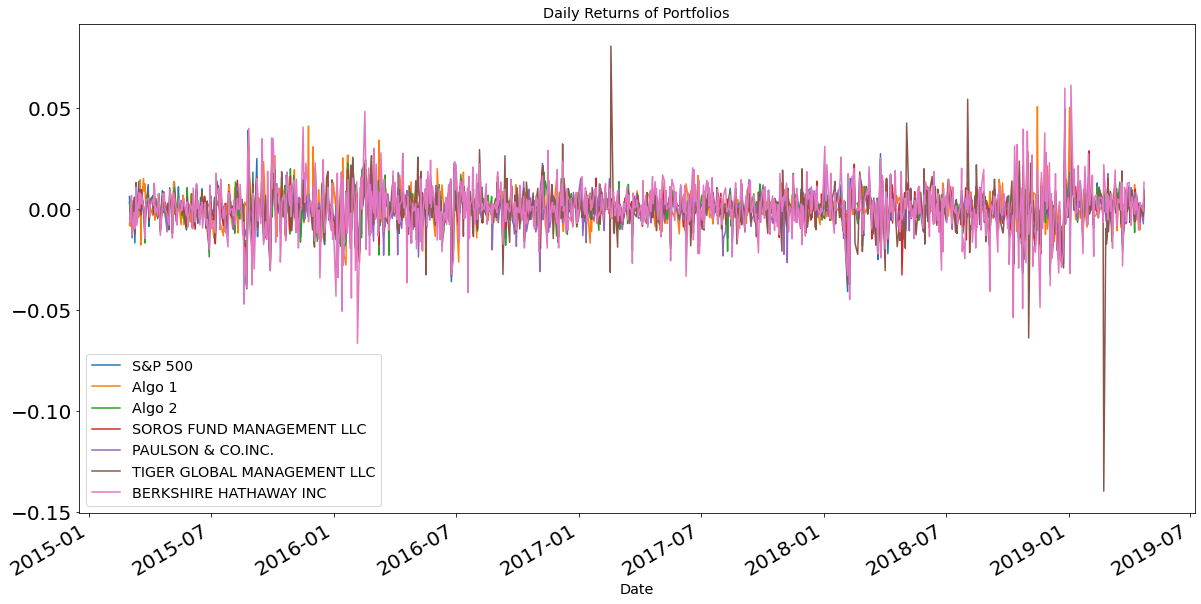

In [246]:
# Plot daily returns of all portfolios

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

concat_data.plot(fontsize=20, title='Daily Returns of Portfolios')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

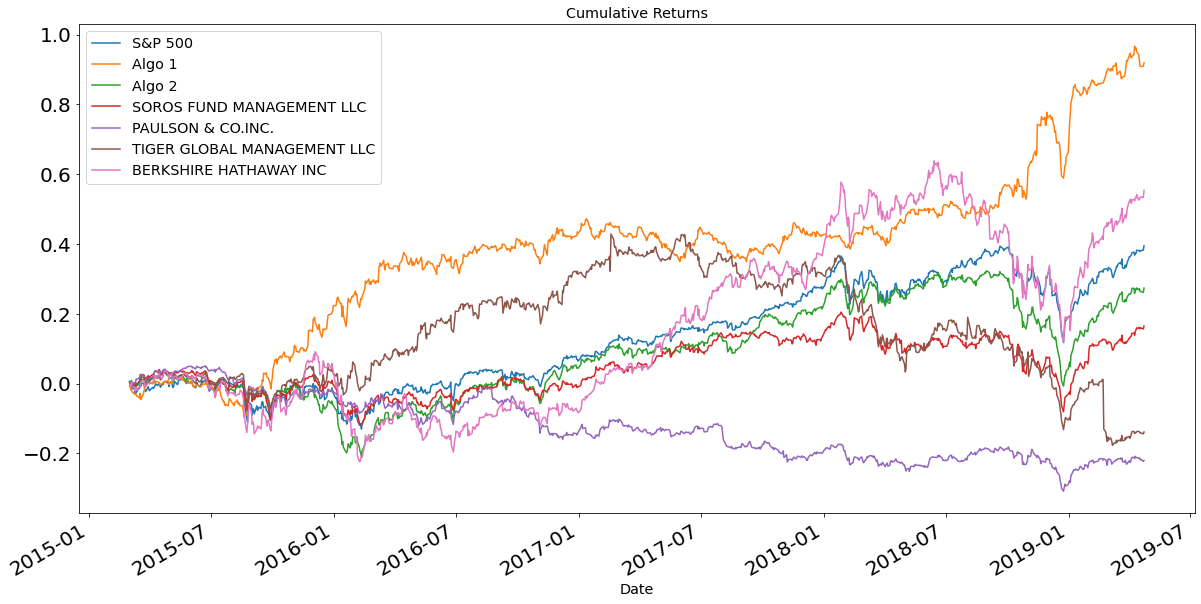

In [247]:
# Calculate cumulative returns of all portfolios
((concat_data + 1).cumprod() - 1).plot(fontsize=20, title='Cumulative Returns')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

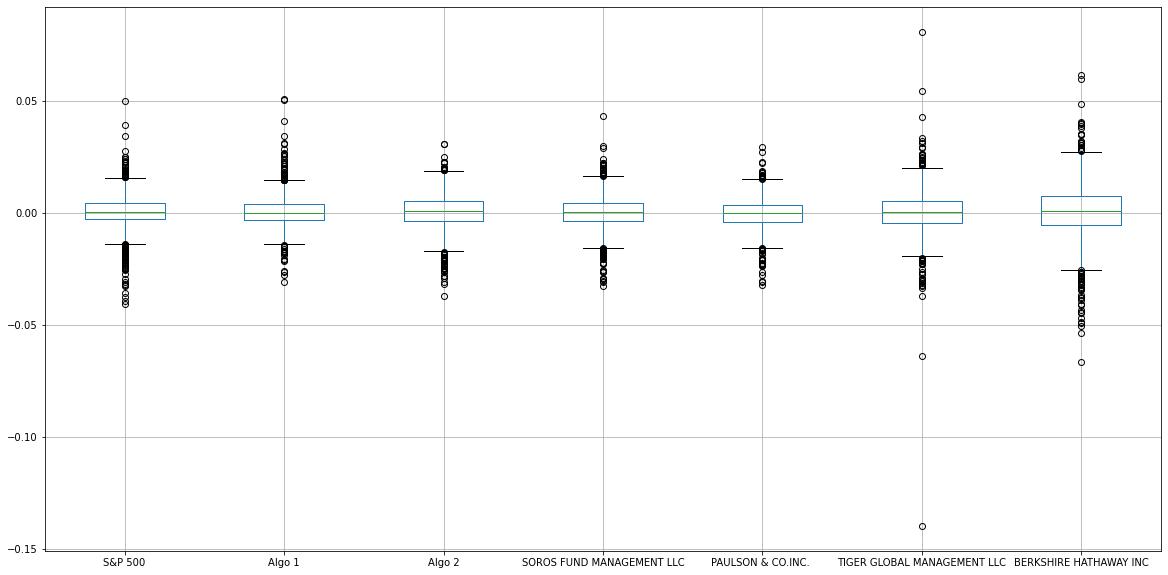

In [248]:
# Box plot to visually show risk
concat_data.boxplot(fontsize=10)

### Calculate Standard Deviations

In [249]:
# Calculate the daily standard deviations of all portfolios
concat_std = concat_data.std().to_frame()
concat_std.columns = ['Std. Dev.']
concat_std

,Std. Dev.
S&P 500,0.008556
Algo 1,0.007621
Algo 2,0.008339
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


### Determine which portfolios are riskier than the S&P 500

In [250]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500
for index in concat_std.index:
    if concat_std['Std. Dev.'][index] > concat_std.iloc[0,0]:
        print(f'{index} is riskier.')
    elif concat_std['Std. Dev.'][index] < concat_std.iloc[0,0]:
        print(f'{index} is safer.')
    else:
        print('')


Algo 1 is safer.
Algo 2 is safer.
SOROS FUND MANAGEMENT LLC is safer.
PAULSON & CO.INC.  is safer.
TIGER GLOBAL MANAGEMENT LLC is riskier.
BERKSHIRE HATHAWAY INC is riskier.


### Calculate the Annualized Standard Deviation

In [251]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = concat_data.std() * np.sqrt(252)
annual_std

S&P 500                        0.135825
Algo 1                         0.120987
Algo 2                         0.132374
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation'}, xlabel='Date'>

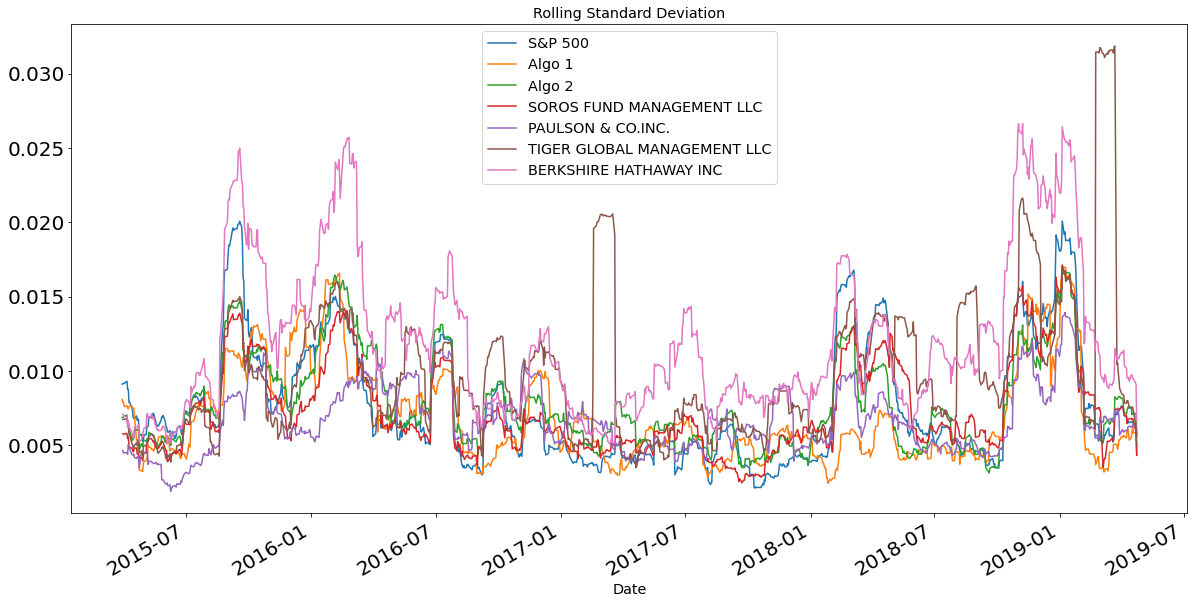

In [252]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = concat_data.rolling(window=21).std()
rolling_std.dropna()
# Plot the rolling standard deviation
rolling_std.plot(fontsize=20, title = 'Rolling Standard Deviation')

### Calculate and plot the correlation

In [253]:
# Calculate the correlation
rolling_std.corr(method='pearson')
# Display de correlation matrix


,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
S&P 500,1.000000,0.699477,0.900865,0.911694,0.597336,0.414415,0.813384
Algo 1,0.699477,1.000000,0.760769,0.721356,0.585584,0.265667,0.794022
Algo 2,0.900865,0.760769,1.000000,0.872922,0.688595,0.359691,0.824877
SOROS FUND MANAGEMENT LLC,0.911694,0.721356,0.872922,1.000000,0.664590,0.451969,0.859187
PAULSON & CO.INC.,0.597336,0.585584,0.688595,0.664590,1.000000,0.407927,0.631215
TIGER GLOBAL MANAGEMENT LLC,0.414415,0.265667,0.359691,0.451969,0.407927,1.000000,0.413311
BERKSHIRE HATHAWAY INC,0.813384,0.794022,0.824877,0.859187,0.631215,0.413311,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Algo 1 vs. S&P 500 Rolling 60-Day Beta'}, xlabel='Date'>

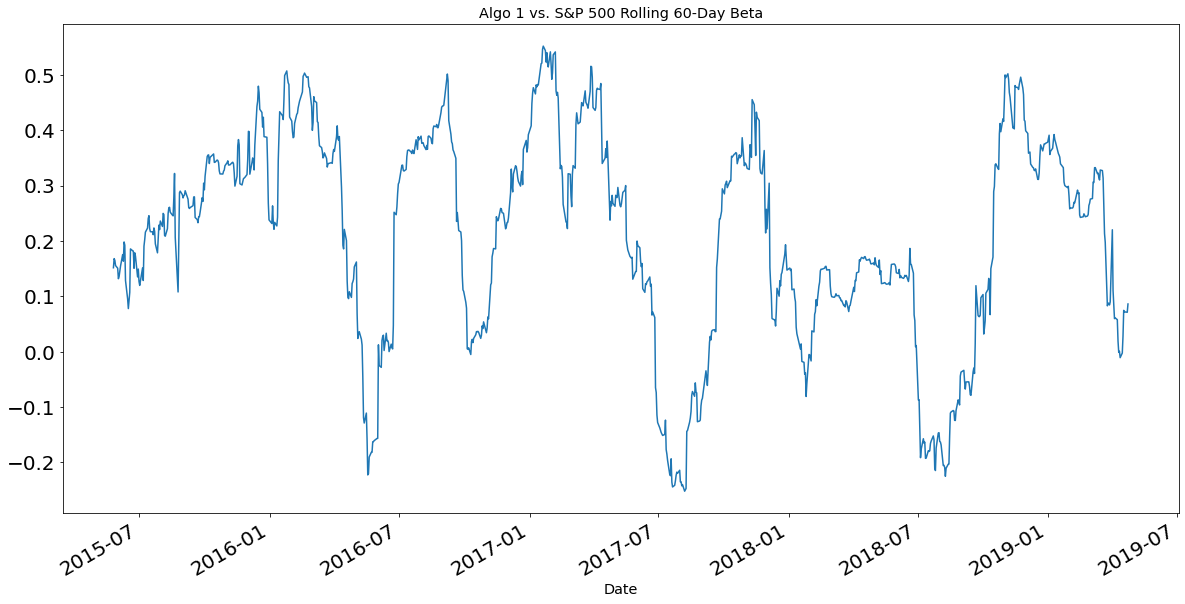

In [254]:
# Calculate covariance of a single portfolio
covariance = concat_data['Algo 1'].rolling(window=60).cov(concat_data['S&P 500'].rolling(window=60))

variance = concat_data['S&P 500'].rolling(window=60).var()

# Plot beta trend
algo_1_beta = covariance / variance
algo_1_beta.dropna()
algo_1_beta.plot(fontsize=20,title='Algo 1 vs. S&P 500 Rolling 60-Day Beta')



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [255]:
# Use `ewm` to calculate the rolling window
ewm = concat_data.ewm(halflife=21).mean()
ewm.head()

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-02,0.006179,-0.008158,0.003200,NaN,NaN,NaN,NaN
2015-03-03,0.000878,-0.004999,0.001091,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.000895,-0.006235,0.001547,0.000511,-0.000802,-0.001532,-0.001089
2015-03-05,-0.000410,-0.004849,0.002276,0.001718,0.000878,-0.000193,0.001603
2015-03-06,-0.003370,-0.004872,-0.000655,-0.000808,-0.000291,-0.002369,-0.002256


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [256]:
# Annualized Sharpe Ratios
sharpe_ratio = (concat_data.mean() * 252) / (concat_data.std() * np.sqrt(252))
sharpe_ratio

S&P 500                        0.659033
Algo 1                         1.360829
Algo 2                         0.506929
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

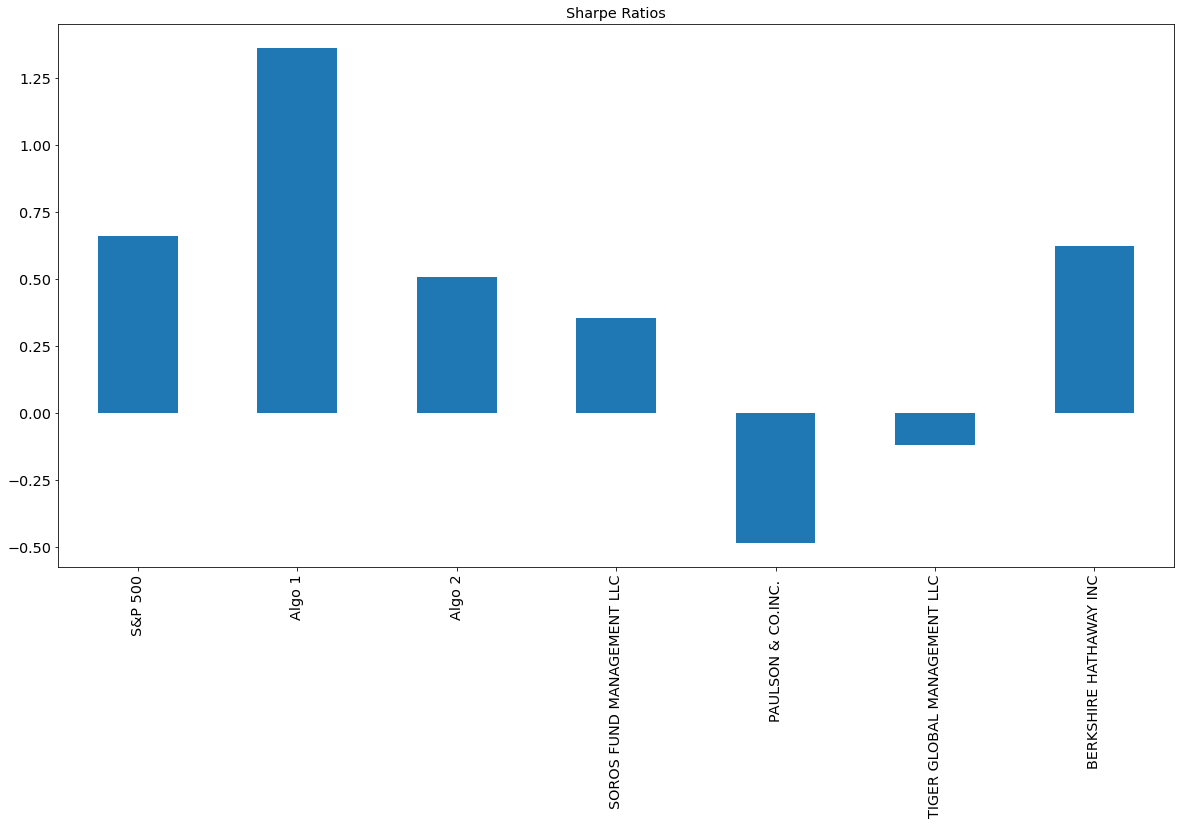

In [257]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algo 1 is by far the best strategy within the list. It outperforms all the competition while Algo 2 falls somewhere in the middle. It does not manage to outperform the S&P, but at least it outperforms multiple other portfolios.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [258]:
# Reading data from 1st stock
aapl_prices_path = Path('Resources/aapl_prices.csv')

aapl_prices = pd.read_csv(aapl_prices_path, 
                               index_col='Date', parse_dates=True, infer_datetime_format=True)
aapl_prices.sort_index(ascending=True)
aapl_prices.head()


,Close
Date,
2015-03-02,32.27
2015-03-03,32.34
2015-03-04,32.14
2015-03-05,31.60
2015-03-06,31.65


In [259]:
# Reading data from 2nd stock
goog_prices_path = Path('Resources/google_prices.csv')

goog_prices = pd.read_csv(goog_prices_path,
                             index_col='Date', parse_dates=True, infer_datetime_format=True)

goog_prices.sort_index(ascending=True)
goog_prices.head()

,Close
Date,
2015-03-02,569.78
2015-03-03,572.07
2015-03-04,571.80
2015-03-05,573.76
2015-03-06,566.13


In [260]:
# Reading data from 3rd stock
tsla_prices_path = Path('Resources/tesla_prices.csv')

tsla_prices = pd.read_csv(tsla_prices_path,
                         index_col='Date', parse_dates=True, infer_datetime_format=True)
tsla_prices.sort_index(ascending=True)
tsla_prices.head()

,Close
Date,
2015-03-02,39.47
2015-03-03,39.91
2015-03-04,40.49
2015-03-05,40.13
2015-03-06,38.78


In [261]:
# Combine all stocks in a single DataFrame
concat_mydata = pd.concat([tsla_prices, goog_prices, aapl_prices],axis='columns',join='inner')
concat_mydata.fillna(0)
concat_mydata.head()

,Close,Close,Close
Date,,,
2015-03-02,39.47,569.78,32.27
2015-03-03,39.91,572.07,32.34
2015-03-04,40.49,571.80,32.14
2015-03-05,40.13,573.76,31.60
2015-03-06,38.78,566.13,31.65


In [262]:
# Reset Date index
concat_mydata.reset_index()

,Date,Close,Close,Close
0,2015-03-02,39.47,569.78,32.27
1,2015-03-03,39.91,572.07,32.34
2,2015-03-04,40.49,571.80,32.14
3,2015-03-05,40.13,573.76,31.60
4,2015-03-06,38.78,566.13,31.65
...,...,...,...,...
1044,2019-04-24,51.73,1256.00,51.79
1045,2019-04-25,49.53,1263.45,51.32
1046,2019-04-26,47.03,1272.18,51.08
1047,2019-04-29,48.29,1287.58,51.15


In [263]:
# Reorganize portfolio data by having a column per symbol
concat_mydata.columns = ['Tesla', 'Google', 'Apple']
concat_mydata.head()

,Tesla,Google,Apple
Date,,,
2015-03-02,39.47,569.78,32.27
2015-03-03,39.91,572.07,32.34
2015-03-04,40.49,571.80,32.14
2015-03-05,40.13,573.76,31.60
2015-03-06,38.78,566.13,31.65


In [264]:
# Calculate daily returns
concat_mydata_pct = concat_mydata.pct_change()
# Drop NAs
concat_mydata_pct.dropna()
# Display sample data
concat_mydata_pct.head()

,Tesla,Google,Apple
Date,,,
2015-03-02,NaN,NaN,NaN
2015-03-03,0.011148,0.004019,0.002169
2015-03-04,0.014533,-0.000472,-0.006184
2015-03-05,-0.008891,0.003428,-0.016801
2015-03-06,-0.033641,-0.013298,0.001582


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [265]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
concat_myreturns = concat_mydata_pct.dot(weights).to_frame()
concat_myreturns.columns = ["Thomas' Returns"]
# Display sample data
concat_myreturns


,Thomas' Returns
Date,
2015-03-02,NaN
2015-03-03,0.005779
2015-03-04,0.002625
2015-03-05,-0.007422
2015-03-06,-0.015119
...,...
2019-04-24,-0.009399
2019-04-25,-0.015224
2019-04-26,-0.016080


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [266]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([concat_data, concat_myreturns])


In [267]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.isnull().sum()

S&P 500                        1049
Algo 1                         1049
Algo 2                         1049
SOROS FUND MANAGEMENT LLC      1050
PAULSON & CO.INC.              1050
TIGER GLOBAL MANAGEMENT LLC    1050
BERKSHIRE HATHAWAY INC         1050
Thomas' Returns                1045
dtype: int64

<AxesSubplot:title={'center':'3-Stock Portfolio vs. Other Portfolios'}, xlabel='Date'>

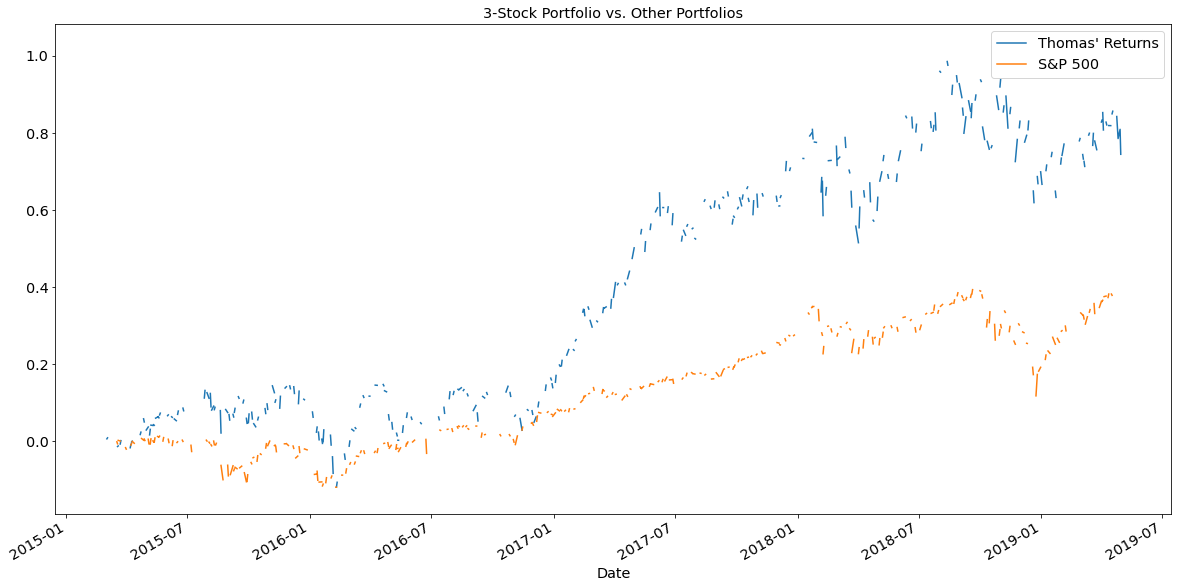

In [268]:
((all_returns[["Thomas' Returns",'S&P 500']] + 1).cumprod() - 1).plot(title='3-Stock Portfolio vs. Other Portfolios', figsize=(20,10))


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [269]:
# Calculate the annualized `std`
all_std = all_returns.std().to_frame()
all_std.columns = ['Std. Dev.']
all_std

,Std. Dev.
S&P 500,0.008556
Algo 1,0.007621
Algo 2,0.008339
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Thomas' Returns,0.014973


### Calculate and plot rolling `std` with 21-day window

[]

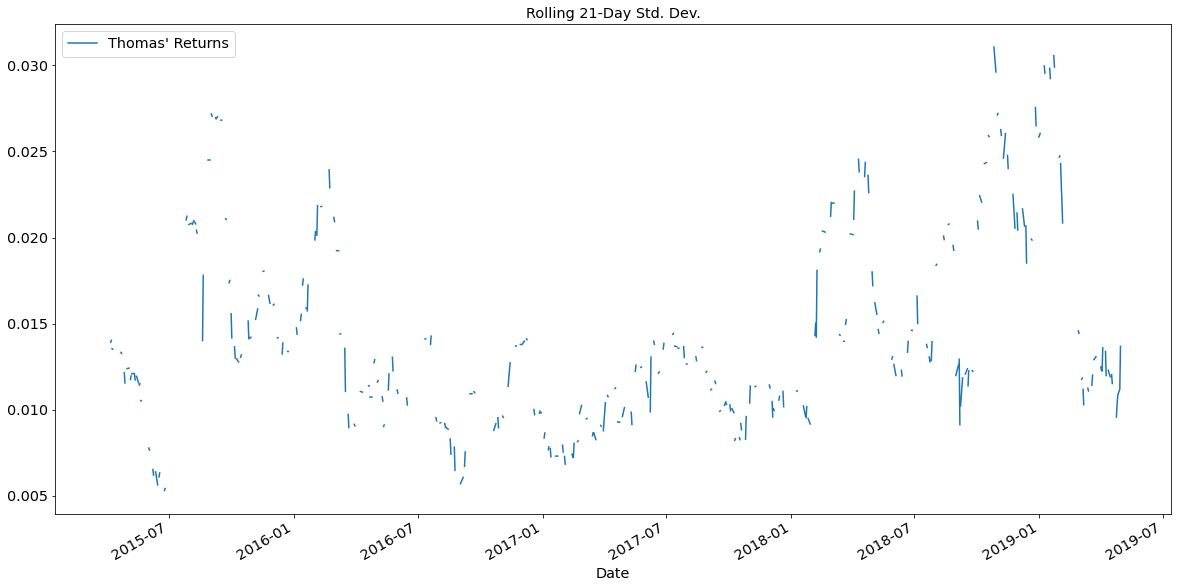

In [270]:
# Calculate rolling standard deviation
all_returns_21std = all_returns[["Thomas' Returns"]].rolling(window=21).std().plot(
    title='Rolling 21-Day Std. Dev.', figsize=(20,10))
# Plot rolling standard deviation
all_returns_21std.plot()

### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Beta vs. S&P 500'}, xlabel='Date'>

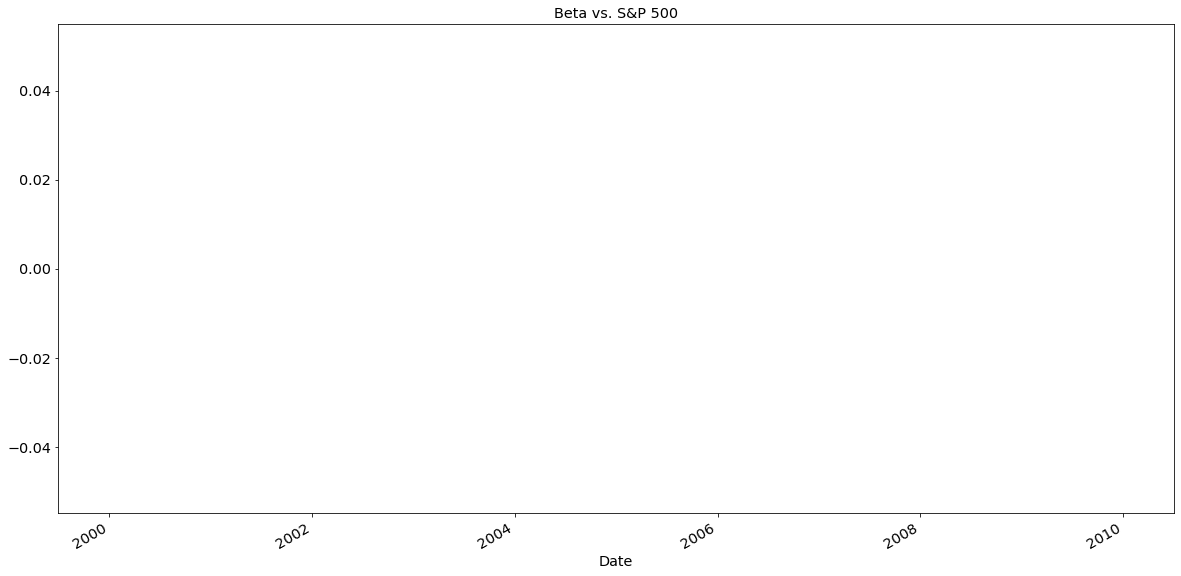

In [286]:
# Calculate and plot Beta
my_cov = all_returns["Thomas' Returns"].rolling(window=60).cov(all_returns['S&P 500'].rolling(window=60))

my_var = all_returns['S&P 500'].rolling(window=60).var()

my_beta = my_cov / my_var

my_beta.plot(title='Beta vs. S&P 500')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [273]:
# Calculate Annualzied Sharpe Ratios
total_sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))


<AxesSubplot:title={'center':'Sharpe Ratios'}>

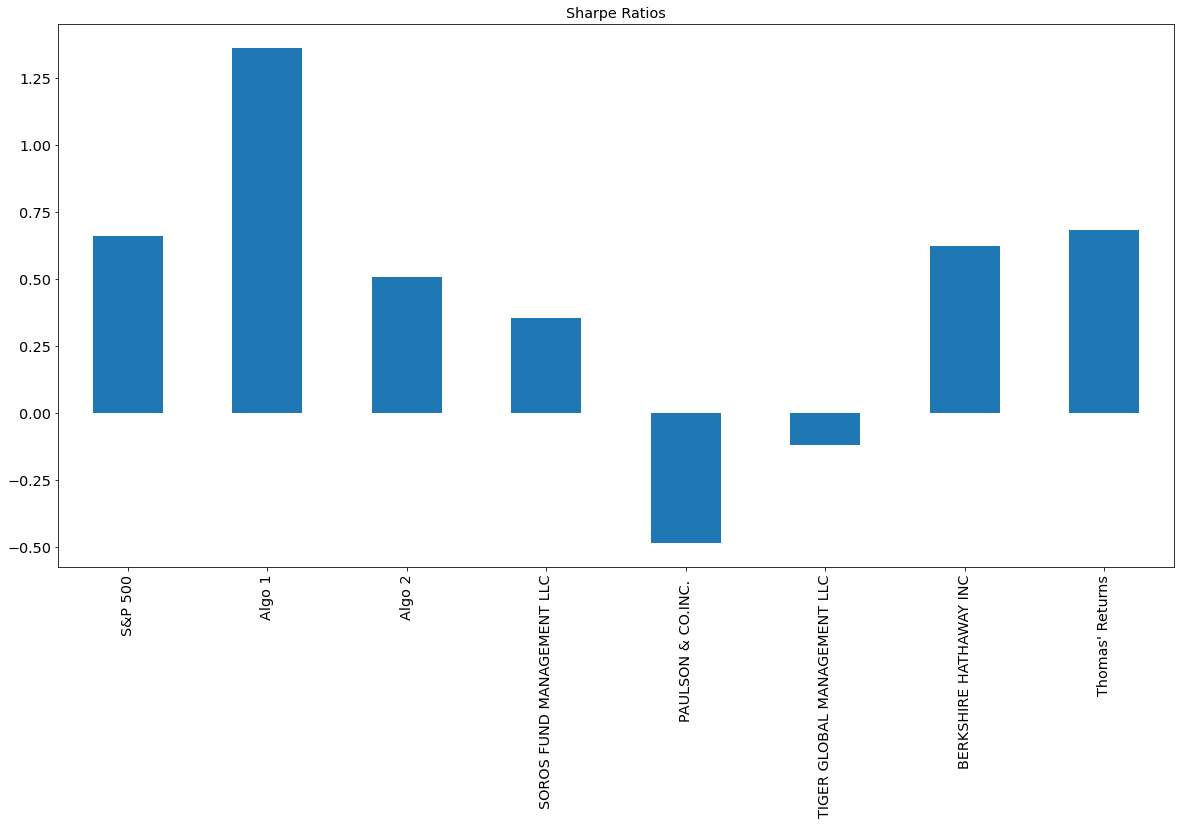

In [274]:
# Visualize the sharpe ratios as a bar plot
total_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios",figsize=(20,10))

### How does your portfolio do?

Write your answer here!

In [226]:
### It did quite well after 2017, and I would think it to be even better in 2020 which is not included in this graph. I guess diversification is really not the answer.